In [1]:
%matplotlib widget
import time, pprint
import numpy as np
import xarray as xa
from matplotlib.image import AxesImage
import matplotlib.pyplot as plt
import rioxarray as rio

Read data, shape = (7753, 9664), #valid = 6988992/74924992, fraction = 0.0932798497996503, read time = 5.553099350134532 min 


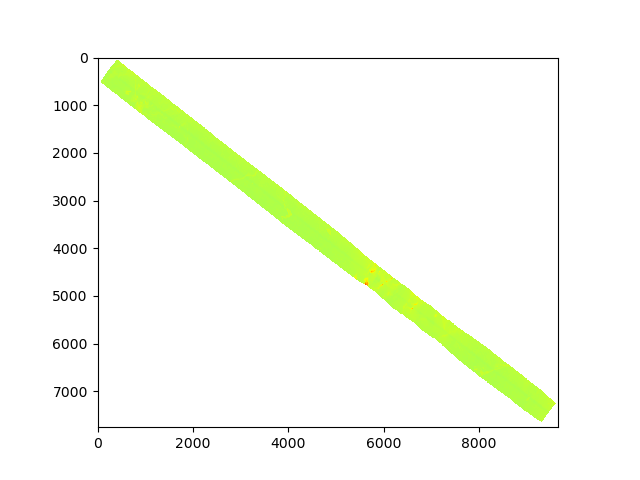

In [2]:
t0 = time.time()

location = "daac"
iband = 150
origin = "upper"
cmap="jet"
image_name = "20170720t004130"
version = "v2p9"

if   location == "desktop":   data_dir, ext = "/Users/tpmaxwel/Development/Data/Aviris/", ".tif"
elif location == "adapt":     data_dir, ext = "/css/above/AVIRIS_Analysis_Ready", ".tif"
elif location == "daac":      data_dir, ext = "/css/above/daac.ornl.gov/daacdata/above/ABoVE_Airborne_AVIRIS_NG/data/", "_img"
else:                         raise Exception( f" Invalid location: {location}")

SpectralDataFile = data_dir + f"/ang{image_name}rfl/ang{image_name}_rfl_{version}/ang{image_name}_corr_{version}{ext}"
print( f"Reading file: {SpectralDataFile}")
data_array: xa.DataArray = rio.open_rasterio( SpectralDataFile )
band_array: np.ndarray = data_array[iband].values.squeeze()
nodata = data_array.attrs.get('_FillValue')
band_array[band_array == nodata] = np.nan
valid_mask = ~np.isnan(band_array)
nvalid = np.count_nonzero(valid_mask)
ntotal = valid_mask.size
print(f"Read data, shape = {band_array.shape}, #valid = {nvalid}/{ntotal}, fraction = {nvalid/ntotal}, read time = {(time.time()-t0)} sec " )
print( "Spatial Ref: ")
print( data_array.spatial_ref )
print( "Coords: ")
for k,c in data_array.coords.items():
    print( f"{k}: {c.shape}" )

xc: np.ndarray =  data_array.coords['xc'].values
yc: np.ndarray =  data_array.coords['yc'].values
print( " --------------------- xc sample: --------------------- ")
for i0 in range(8):
    print( xc[i0,0:8].tolist() )
print( " --------------------- yc sample: --------------------- ")
for i0 in range(8):
    print( yc[i0,0:8].tolist() )

ax0 = plt.axes( )
img0: AxesImage = ax0.imshow( band_array, origin=origin, cmap=cmap )
plt.show()